In [14]:
import numpy as np
import pandas as pd
import pylab as plt
#import matplotlib as plt

In [2]:
gdp1 = pd.read_csv('GDP_1.csv')
gdp2 = pd.read_csv('GDP_2.csv')

In [3]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)  # more options can be specified also

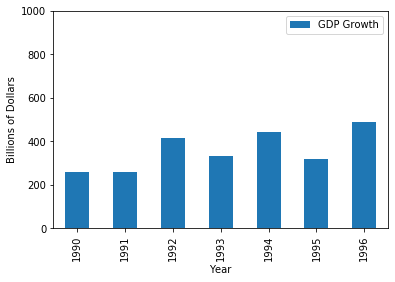

In [4]:
gdp1['GDP Growth'] = gdp1.iloc[:,1].diff()
gdp1['Year'] = pd.to_datetime(gdp1['DATE'])
gdp1['Year'] = gdp1['Year'].dt.strftime('%Y')
gdp1_yearly = gdp1.groupby('Year')['GDP Growth'].sum()
gdp1_yearly
gdp1_final = pd.DataFrame(gdp1_yearly)
gdp1_clean = gdp1_final.drop('1989')
gdp1_reset = gdp1_clean.reset_index()
gdp1_plot = gdp1_clean.plot.bar(yticks = np.arange(0,1100, step=200)).set_ylabel('Billions of Dollars')
gdp1_fig = gdp1_plot.get_figure()
#gdp1_fig.savefig('gdp1.png', bbox_inches = "tight")

before = gdp1_yearly.sum()/len(gdp1_yearly)

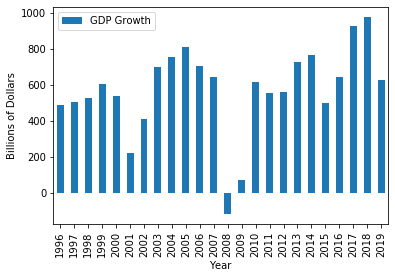

In [5]:
gdp2['GDP Growth'] = gdp2.iloc[:,1].diff()
gdp2['Year'] = pd.to_datetime(gdp2['DATE'])
gdp2['Year'] = gdp2['Year'].dt.strftime('%Y')
gdp2_yearly = gdp2.groupby('Year')['GDP Growth'].sum()
gdp2_yearly
gdp2_final = pd.DataFrame(gdp2_yearly)
gdp2_clean = gdp2_final.drop('1995')
gdp2_reset = gdp2_clean.reset_index()
gdp2_plot = gdp2_clean.plot.bar().set_ylabel('Billions of Dollars')
gdp2_fig = gdp2_plot.get_figure()
#gdp2_fig.savefig('gdp2.png', bbox_inches = "tight")

after = gdp2_yearly.sum()/len(gdp2_yearly)

In [17]:
gdp2_years = gdp2_reset.set_index('Year')
gdp2_years_reset = gdp2_years.drop(['2017','2018','2019'])
gdp2_years_final = gdp2_years_reset.reset_index()
gdp2_years_final

,Year,GDP Growth
0,1996,487.185
1,1997,506.136
2,1998,528.084
3,1999,605.387
4,2000,539.647
5,2001,221.269
6,2002,411.169
7,2003,697.812
8,2004,753.150
9,2005,809.891


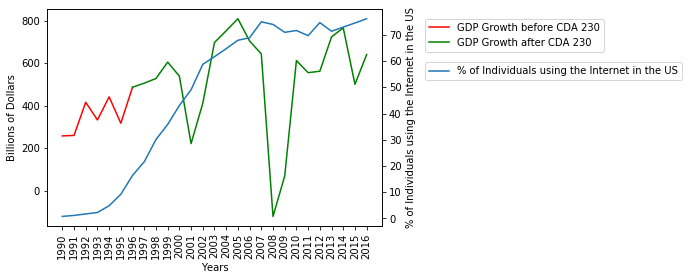

In [26]:
plt.plot(gdp1_reset['Year'],gdp1_reset['GDP Growth'],'r', label='GDP Growth before CDA 230')
plt.plot(gdp2_years_final['Year'],gdp2_years_final['GDP Growth'],'g', label='GDP Growth after CDA 230')
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Billions of Dollars')
plt.legend(bbox_to_anchor=(1.10, 1), loc=2, borderaxespad=1)



ax2 = plt.twinx()

ax2.plot(internet_final['Year'], internet_final['Individuals using the Internet (% of population) (% of population)'], label = '% of Individuals using the Internet in the US')
ax2.set_ylabel("% of Individuals using the Internet in the US")
ax2.legend(bbox_to_anchor=(1.10, .8), loc=2, borderaxespad=1)


plt.show()

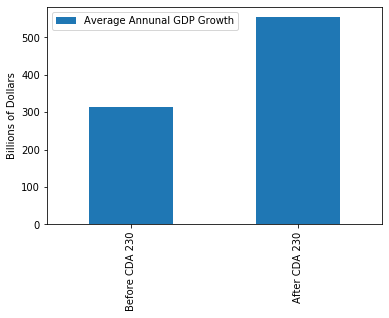

In [6]:
import matplotlib as plt
import seaborn as sns
cda_230_impact = {}
cda_230_impact[''] = 'Before CDA 230', 'After CDA 230'
cda_230_impact['Average Annunal GDP Growth'] = before, after

df = pd.DataFrame(cda_230_impact)
df1 = df.set_index('')
plot3 = df1.plot(kind = 'bar').set_ylabel('Billions of Dollars')
fig3 = plot3.get_figure()
fig3.savefig('CDA_Analysis.png',  bbox_inches = "tight")


In [11]:
internet = pd.read_csv('internet.csv')
internet

,Entity,Code,Year,Individuals using the Internet (% of population) (% of population)
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,2001,0.004723
2,Afghanistan,AFG,2002,0.004561
3,Afghanistan,AFG,2003,0.087891
4,Afghanistan,AFG,2004,0.105809
5,Afghanistan,AFG,2005,1.224148
6,Afghanistan,AFG,2006,2.107124
7,Afghanistan,AFG,2007,1.900000
8,Afghanistan,AFG,2008,1.840000
9,Afghanistan,AFG,2009,3.550000


In [12]:
internet = internet.loc[internet['Entity'] == 'United States']
internet_final = internet.drop(['Entity', 'Code'], axis = 1)
#internet_final
internet_final['Year'] = pd.to_datetime(internet_final['Year'],format = '%Y')
#internet_final
internet_final['Year'] = internet_final['Year'].dt.strftime('%Y')
internet_final

,Year,Individuals using the Internet (% of population) (% of population)
5767,1990,0.784729
5768,1991,1.163194
5769,1992,1.724203
5770,1993,2.271673
5771,1994,4.862781
5772,1995,9.237088
5773,1996,16.419353
5774,1997,21.616401
5775,1998,30.093197
5776,1999,35.848724
